In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [47]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [48]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_Boot"]

In [49]:
# (60000, 28, 28)= 6 thousand image files of 28*28 size
train_images.shape

(60000, 28, 28)

In [50]:
train_images.ndim

3

In [51]:
len(train_labels)

60000

In [52]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [53]:
test_images.shape

(10000, 28, 28)

In [54]:
len(test_labels)

10000

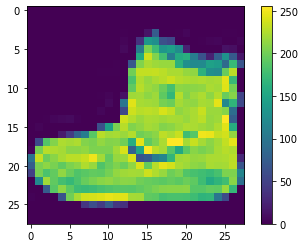

In [55]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [56]:
# We put values between 0-1.
train_images = train_images / 255.0
test_images = test_images / 255.0

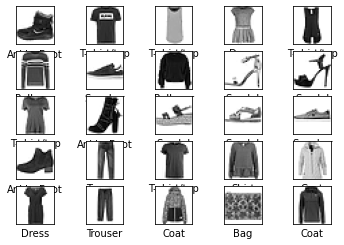

In [57]:
plt.figure()

for i in range(25):
    plt.subplot(5,5,i+1) # subplot(nrows, ncols, index, **kwargs)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [59]:
model = Sequential()

model.add(Flatten(input_shape= (28,28))) # We vectorize the data.(input_shape= size of pictures)
model.add(Dense(256, activation= "relu"))
#Last Layer
model.add(Dense(10, activation="softmax")) # neuron = number of classes

model.compile(optimizer="adam",
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"])

In [60]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10


C:\Users\ygok\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 2s 1ms/step - loss: 0.4816 - accuracy: 0.8291 - val_loss: 0.4081 - val_accuracy: 0.8531
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3601 - accuracy: 0.8684 - val_loss: 0.3815 - val_accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3261 - accuracy: 0.8799 - val_loss: 0.3506 - val_accuracy: 0.8731
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3015 - accuracy: 0.8895 - val_loss: 0.3757 - val_accuracy: 0.8668
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.8949 - val_loss: 0.3381 - val_accuracy: 0.8805
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2724 - accuracy: 0.8985 - val_loss: 0.3285 - val_accuracy: 0.8829
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2571 - accuracy: 0.9036 - val_loss: 0.3229 - val_accuracy: 0.8838
Epo

# Accuracy Evaluation

In [61]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc}\nTest Loss: {test_loss}")

313/313 - 0s - loss: 0.3544 - accuracy: 0.8819 - 193ms/epoch - 615us/step

Test Accuracy: 0.8819000124931335
Test Loss: 0.3543640971183777


In [62]:
probability_model = Sequential([model,
                                tf.keras.layers.Softmax()])

In [63]:
predictions = probability_model.predict(test_images)

In [64]:
predictions[0]

array([0.08548342, 0.08548342, 0.08548342, 0.08548342, 0.08548342,
       0.08567779, 0.08548342, 0.08630541, 0.08548342, 0.2296328 ],
      dtype=float32)

In [65]:
np.argmax(predictions[0])

9

In [66]:
test_labels[0]

9

In [67]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

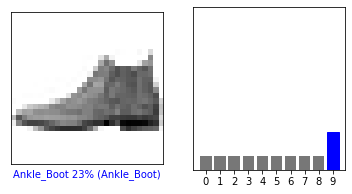

In [68]:
i = 0
plt.figure(figsize=(6,3)) # 6*3 size
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

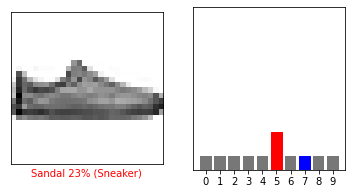

In [69]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

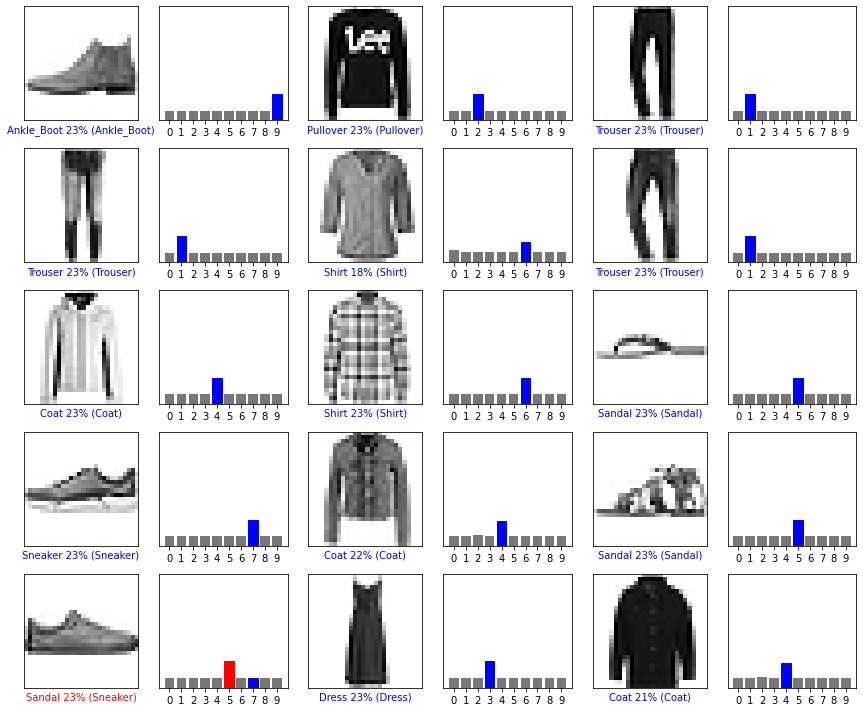

In [70]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

# Single Image Estimation

In [71]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [72]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [73]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08535776 0.08535576 0.23166822 0.08535576 0.08548307 0.08535576
  0.08535641 0.08535576 0.08535576 0.08535576]]


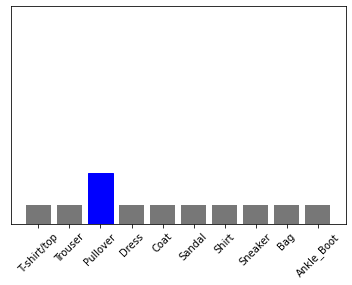

In [74]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [75]:
np.argmax(predictions_single[0])

2